In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os.path as op
import json
import torch

data_path = '/content/drive/My Drive/ML/'

# Open the JSON file
with open(data_path + 'data4.json', 'r') as file:
    # Load the JSON data
    loaded_data = json.load(file)

data = np.array(loaded_data['x'])
data = data.astype(float)

In [5]:
import numpy as np
from scipy.signal import butter, filtfilt

# Define the filter parameters
low_freq = 1
high_freq = 50
sampling_rate = 250  # Assuming a sampling rate of 100 Hz

# Calculate the Nyquist frequency
nyquist_freq = 0.5 * sampling_rate

# Normalize the cutoff frequencies
normalized_low_freq = low_freq / nyquist_freq
normalized_high_freq = high_freq / nyquist_freq

# Define the filter order (adjust as needed)
filter_order = 2

# Compute the Butterworth filter coefficients
b, a = butter(filter_order, [normalized_low_freq, normalized_high_freq], btype='band')

# Apply the filter to each data sample
filtered_data = np.zeros_like(data)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        filtered_data[i, j, :] = filtfilt(b, a, data[i, j, :])

In [6]:
import scipy

# Mean amplitude
mean_amplitude = np.mean(filtered_data, axis=1)

# Variance
variance = np.var(filtered_data, axis=1)

# Standard deviation
std_dev = np.std(filtered_data, axis=1)

# Skewness
skewness = scipy.stats.skew(filtered_data, axis=1)

# Kurtosis
kurtosis = scipy.stats.kurtosis(filtered_data, axis=1)

# Zero-crossing rate
zero_crossing_rate = np.sum(np.diff(np.signbit(filtered_data), axis=1), axis=1)

In [7]:
from scipy.signal import welch

sampling_rate = 250  # Assuming a sampling rate of 250 Hz

# Power spectral density
freq, psd = welch(filtered_data, fs=sampling_rate, axis=1)

# Band power
alpha_band_power = np.mean(psd[:, (freq >= 8) & (freq <= 12)], axis=1)
beta_band_power = np.mean(psd[:, (freq >= 13) & (freq <= 30)], axis=1)
theta_band_power = np.mean(psd[:, (freq >= 4) & (freq <= 7)], axis=1)

# Spectral entropy
spectral_entropy = -np.sum(psd * np.log2(psd), axis=1)

# Peak frequency
peak_frequency = freq[np.argmax(psd, axis=1)]

# Inter-band power ratio
inter_band_power_ratio = alpha_band_power / beta_band_power

In [8]:
time1 = np.array(mean_amplitude)
time2 = np.array(variance)
time3 = np.array(std_dev)
time4 = np.array(skewness)
time5 = np.array(kurtosis)
time6 = np.array(zero_crossing_rate)

freq1 = np.array(alpha_band_power)
freq2 = np.array(beta_band_power)
freq3 = np.array(theta_band_power)
freq4 = np.array(spectral_entropy)
freq5 = np.array(peak_frequency)
freq6 = np.array(inter_band_power_ratio)

# Stack the arrays along the third axis
stacked_array = np.stack((time1, time2, time3, time4, time5, time6, freq1, freq2, freq3, freq4, freq5, freq6), axis=2)

In [9]:
flattened_data = stacked_array.reshape((stacked_array.shape[0], -1))
flattened_data = np.nan_to_num(flattened_data, nan=0)

from sklearn.decomposition import PCA

pca = PCA(n_components=70)
X_new = pca.fit_transform(flattened_data)

In [10]:
filter_flatten = filtered_data.reshape((filtered_data.shape[0], -1))
filter_flatten = np.nan_to_num(filter_flatten, nan=0)

pca = PCA(n_components=120)
X_new2 = pca.fit_transform(filter_flatten)

In [11]:
output_values = loaded_data['y']
output_values = [x - 1 for x in output_values]

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

mean = np.mean(filtered_data, axis=0)
std = np.std(filtered_data, axis=0)

# Normalize the data by subtracting the mean and dividing by the standard deviation
normalized_data = (filtered_data - mean) / std

np_list = X_new2
np_list = np.nan_to_num(np_list, nan=0)

flattened_data = np_list.reshape(np_list.shape[0], -1)
# X_train, X_test, y_train, y_test = train_test_split(flattened_data, output_values, test_size=0.1, random_state=42)

In [13]:
lda = LinearDiscriminantAnalysis()
accuracies = cross_val_score(lda, flattened_data, output_values, cv=15)
accuracy = mean_accuracy = accuracies.mean() * 100
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 40.7368


Confusion Matrix:
[[6 5 2 1]
 [7 8 2 0]
 [2 2 7 1]
 [2 5 3 5]]


<Axes: >

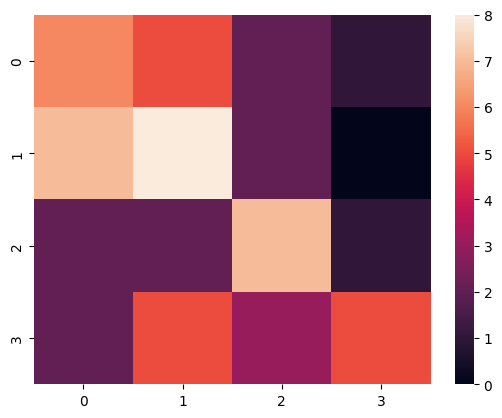

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(flattened_data, output_values, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Step 2: Evaluate the model
y_pred = lda.predict(X_test)

# Step 3: Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Step 4: Analyze the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

sns.heatmap(confusion_matrix(
    y_test,
    y_pred
))

In [15]:
np_list = filtered_data
np_list = np.nan_to_num(np_list, nan=0)

flattened_data = np_list.reshape(np_list.shape[0], -1)

In [16]:
from sklearn.svm import SVC

svm = SVC()
accuracies = cross_val_score(svm, flattened_data, output_values, cv=10)
accuracy = mean_accuracy = accuracies.mean() * 100
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 45.8498


Confusion Matrix:
[[ 7  5  1  1]
 [ 4 10  0  3]
 [ 2  3  6  1]
 [ 5  3  2  5]]


<Axes: >

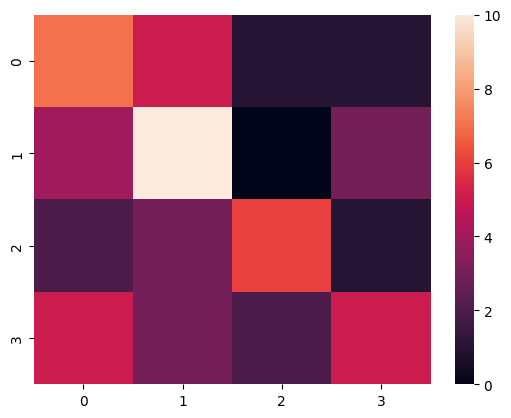

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(flattened_data, output_values, test_size=0.2, random_state=42)

svc = SVC()
svc.fit(X_train, y_train)

# Step 2: Evaluate the model
y_pred = svc.predict(X_test)

# Step 3: Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Step 4: Analyze the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

sns.heatmap(confusion_matrix(
    y_test,
    y_pred
))